In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from datasets import load_data
from model import S6_Model_1,model_summary
import matplotlib.pyplot as plt


import sys
sys.path.append('S6/mnist/utils.py')
from util import test, train, plot_acc_loss
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
train_loader ,  test_loader  = load_data(batch_size=64)


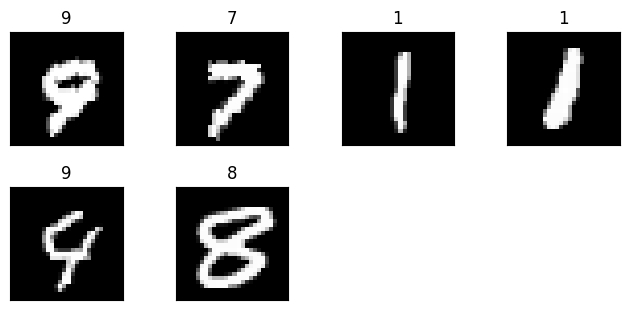

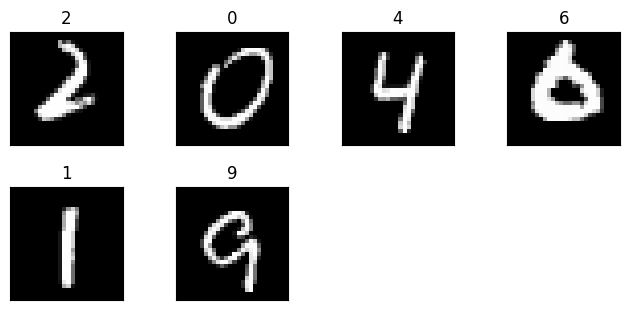

In [3]:
def plot_image(loader,no_images):
    batch_data, batch_label = next(iter(loader))
    _ = plt.figure()

    for i in range(no_images):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(batch_data[i].squeeze(0), cmap='gray')
        plt.title(batch_label[i].item())
        plt.xticks([])
        plt.yticks([])


plot_image(train_loader,6)
plot_image(test_loader,6)

In [99]:
model = S6_Model_1()
model_summary(model,input_size= (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           1,568
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 28, 14, 14]           8,092
       BatchNorm2d-6           [-1, 28, 14, 14]              56
              ReLU-7           [-1, 28, 14, 14]               0
            Conv2d-8           [-1, 16, 14, 14]           4,048
       BatchNorm2d-9           [-1, 16, 14, 14]              32
             ReLU-10           [-1, 16, 14, 14]               0
        MaxPool2d-11             [-1, 16, 7, 7]               0
           Conv2d-12              [-1, 8, 7, 7]           1,160
      BatchNorm2d-13              [-1, 8, 7, 7]              16
             ReLU-14              [-1, 

In [101]:
model = S6_Model_1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 18




for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




Epoch 1


Train: Loss=0.2440 Batch_id=937 Accuracy=78.72: 100%|██████████| 938/938 [00:34<00:00, 27.00it/s]


Test set: Average loss: 0.0023, Accuracy: 9559/10000 (95.59%)

Epoch 2


Train: Loss=0.1210 Batch_id=937 Accuracy=96.01: 100%|██████████| 938/938 [00:36<00:00, 25.78it/s]


Test set: Average loss: 0.0010, Accuracy: 9800/10000 (98.00%)

Epoch 3


Train: Loss=0.4837 Batch_id=937 Accuracy=97.02: 100%|██████████| 938/938 [00:35<00:00, 26.21it/s]


Test set: Average loss: 0.0011, Accuracy: 9791/10000 (97.91%)

Epoch 4


Train: Loss=0.0644 Batch_id=937 Accuracy=97.53: 100%|██████████| 938/938 [00:35<00:00, 26.13it/s]


Test set: Average loss: 0.0006, Accuracy: 9876/10000 (98.76%)

Epoch 5


Train: Loss=0.0465 Batch_id=937 Accuracy=97.95: 100%|██████████| 938/938 [00:38<00:00, 24.44it/s]


Test set: Average loss: 0.0006, Accuracy: 9892/10000 (98.92%)

Epoch 6


Train: Loss=0.1761 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [00:38<00:00, 24.63it/s]


Test set: Average loss: 0.0005, Accuracy: 9888/10000 (98.88%)

Epoch 7


Train: Loss=0.2375 Batch_id=937 Accuracy=98.20: 100%|██████████| 938/938 [00:37<00:00, 24.96it/s]


Test set: Average loss: 0.0005, Accuracy: 9901/10000 (99.01%)

Epoch 8


Train: Loss=0.0398 Batch_id=937 Accuracy=98.33: 100%|██████████| 938/938 [00:43<00:00, 21.40it/s]


Test set: Average loss: 0.0005, Accuracy: 9912/10000 (99.12%)

Epoch 9


Train: Loss=0.0147 Batch_id=937 Accuracy=98.41: 100%|██████████| 938/938 [00:35<00:00, 26.13it/s]


Test set: Average loss: 0.0005, Accuracy: 9904/10000 (99.04%)

Epoch 10


Train: Loss=0.0514 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [00:35<00:00, 26.25it/s]


Test set: Average loss: 0.0007, Accuracy: 9857/10000 (98.57%)

Epoch 11


Train: Loss=0.0071 Batch_id=937 Accuracy=98.52: 100%|██████████| 938/938 [00:46<00:00, 19.96it/s]


Test set: Average loss: 0.0005, Accuracy: 9909/10000 (99.09%)

Epoch 12


Train: Loss=0.0051 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:37<00:00, 24.73it/s]


Test set: Average loss: 0.0005, Accuracy: 9899/10000 (98.99%)

Epoch 13


Train: Loss=0.0522 Batch_id=937 Accuracy=98.62: 100%|██████████| 938/938 [00:34<00:00, 27.10it/s]


Test set: Average loss: 0.0003, Accuracy: 9933/10000 (99.33%)

Epoch 14


Train: Loss=0.0029 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [00:34<00:00, 27.12it/s]


Test set: Average loss: 0.0004, Accuracy: 9910/10000 (99.10%)

Epoch 15


Train: Loss=0.0016 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [00:34<00:00, 27.03it/s]


Test set: Average loss: 0.0004, Accuracy: 9917/10000 (99.17%)

Epoch 16


Train: Loss=0.0028 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:34<00:00, 27.51it/s]


Test set: Average loss: 0.0003, Accuracy: 9933/10000 (99.33%)

Epoch 17


Train: Loss=0.0699 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:39<00:00, 23.79it/s]


Test set: Average loss: 0.0003, Accuracy: 9933/10000 (99.33%)

Epoch 18


Train: Loss=0.0395 Batch_id=937 Accuracy=99.12: 100%|██████████| 938/938 [00:41<00:00, 22.52it/s]


Test set: Average loss: 0.0003, Accuracy: 9940/10000 (99.40%)



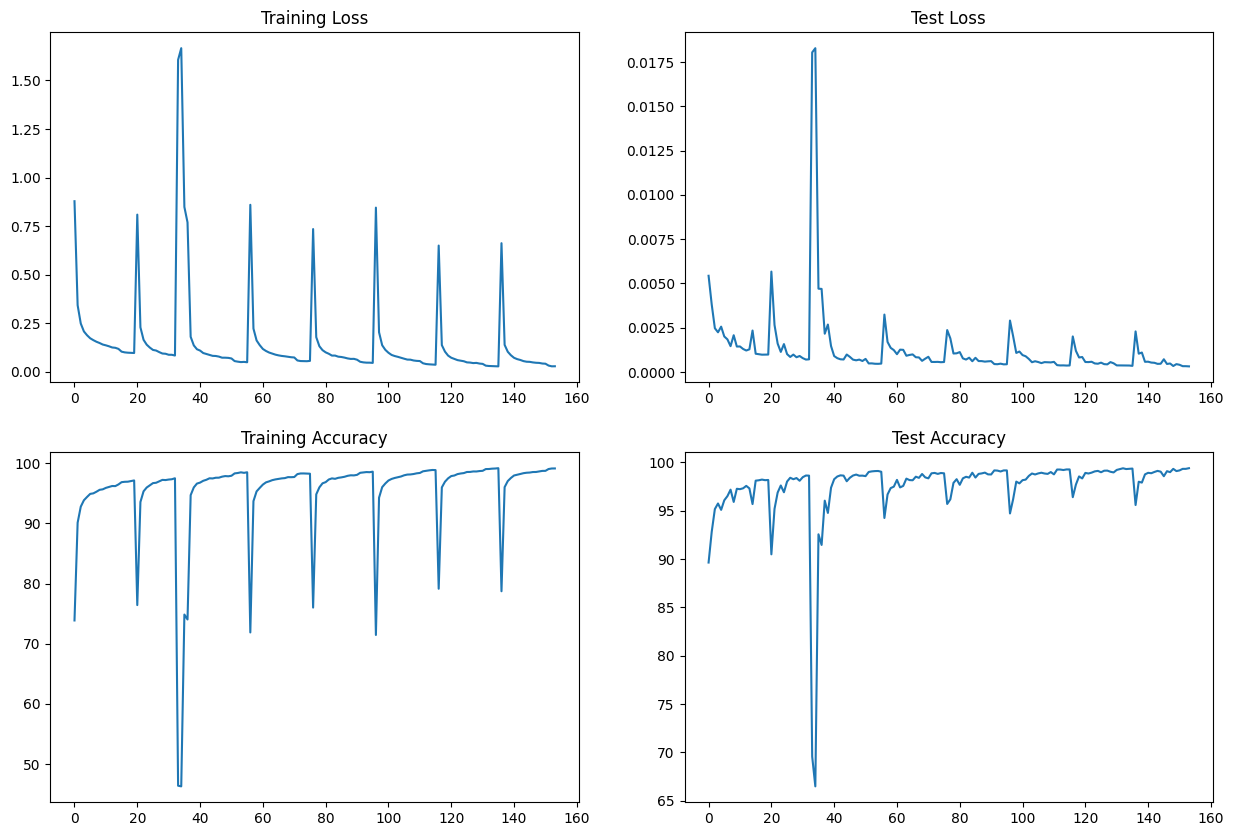

In [102]:
plot_acc_loss()